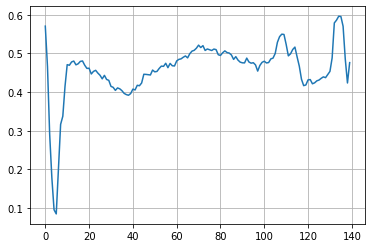

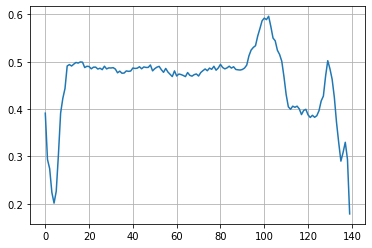

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ### Test on ECG Data

# The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).
# 
# Try to design and train your MLP to classify normal and abnormal ECG samples.

# In[ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


# In[ ]:


# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()


# In[ ]:


plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()


# More about the dataset from the link,
# "The original dataset for "ECG5000" is a 20-hour long ECG downloaded from Physionet. The name is BIDMC Congestive Heart Failure Database(chfdb) and it is record "chf07". It was originally published in "Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23)". The data was pre-processed in two steps: (1) extract each heartbeat, (2) make each heartbeat equal length using interpolation. This dataset was originally used in paper "A general framework for never-ending learning from time series streams", DAMI 29(6). After that, 5,000 heartbeats were randomly selected. The patient has severe congestive heart failure and the class values were obtained by automated annotation"
# 
# See [link dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000) 


In [ ]:
dataframe.value_counts()

0          1          2          3          4          5          6          7          8          9          10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56        57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         89         90         

In [2]:
# The input to the LSTM layer must be three-dimensional
x_train = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
x_test = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))
print(x_train)

[[[0.57030463]
  [0.46561658]
  [0.29058117]
  ...
  [0.48504233]
  [0.4233502 ]
  [0.47598344]]

 [[0.48320588]
  [0.28246963]
  [0.16471253]
  ...
  [0.567567  ]
  [0.4677294 ]
  [0.2692329 ]]

 [[0.48144642]
  [0.35151404]
  [0.25972766]
  ...
  [0.5479421 ]
  [0.5077544 ]
  [0.54298663]]

 ...

 [[0.41039047]
  [0.24164985]
  [0.13120876]
  ...
  [0.5277313 ]
  [0.5654091 ]
  [0.5023885 ]]

 [[0.5397748 ]
  [0.4140786 ]
  [0.28101394]
  ...
  [0.51266515]
  [0.43706053]
  [0.4426865 ]]

 [[0.29639772]
  [0.15988176]
  [0.18883787]
  ...
  [0.53766966]
  [0.545786  ]
  [0.40826708]]]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 140, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
119/119 [==============================] - 25s 180ms/step - loss: 0.1705 - val_loss: 0.0394


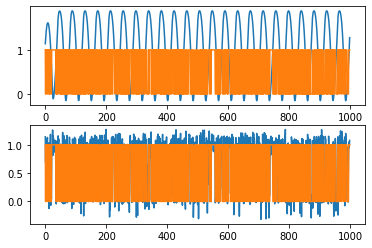

In [ ]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation，Dropout
# from keras.layers.recurrent import LSTM
# from numpy import newaxis


# SEQ_LENGTH = 100
# sequence_length = SEQ_LENGTH + 1


# # Neural Network model
# HIDDEN_DIM = 512
# LAYER_NUM = 10
# model = Sequential()
# model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
# model.add(LSTM(100, return_sequences=False))
# model.add(Dense(1))
# model.add(Activation('linear'))
# model.compile(loss="mse", optimizer="rmsprop")
# model.summary()
# BATCH_SIZE = 32
# epoch = 1
# model.fit(x_train, train_labels, batch_size=BATCH_SIZE, verbose=1, epochs=epoch, validation_split=0.05)
 
# # start with first frame
# curr_frame = x_test[0]
 
# # start with zeros
# # curr_frame = np.zeros((100,1))
 
# predicted = []
# for i in range(len(x_test)):
#     predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
#     curr_frame = curr_frame[1:]
#     curr_frame = np.insert(curr_frame, [SEQ_LENGTH - 1], predicted[-1], axis=0)
# predicted1 = model.predict(x_test)
# predicted1 = np.reshape(predicted1, (predicted1.size,))
 
# plt.figure(1)
# plt.subplot(211)
# plt.plot(predicted)
# plt.plot(test_labels)
# plt.subplot(212)
# plt.plot(predicted1)
# plt.plot(test_labels)
# plt.show()


> Loading data... 
X_train shape: (3998, 140, 1)
y_train shape: (3998,)
X_test shape: (1000, 140, 1)
y_test shape: (1000,)
> Data Loaded. Compiling...
119/119 [==============================] - 22s 158ms/step - loss: 0.2221 - val_loss: 0.0397
multiple_predictions shape: (20, 50)
full_predictions shape: (1000,)
predicted shape: (1000, 1)
point_by_point_predictions shape: (1000,)


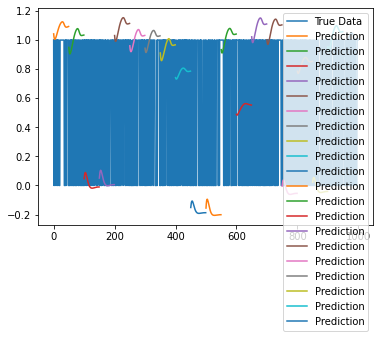

<Figure size 432x288 with 0 Axes>

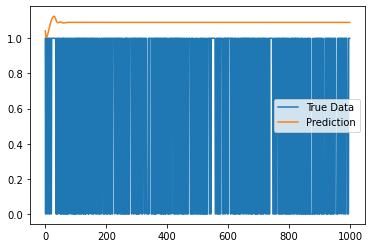

<Figure size 432x288 with 0 Axes>

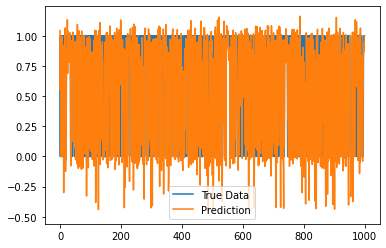

<Figure size 432x288 with 0 Axes>

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from numpy import newaxis



BATCH_SIZE = 32

#Direct total prediction
def predict_point_by_point(model, data):
    predicted = model.predict(data)
    print('predicted shape:',np.array(predicted).shape)  #(412L,1L)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted


#Rolling forecasts
def predict_sequence_full(model, data, window_size):  #data X_test
    curr_frame = data[0]  #(50L,1L)
    predicted = []
    for i in range(len(data)):
        #x = np.array([[[1],[2],[3]], [[4],[5],[6]]])  x.shape (2, 3, 1) x[0,0] = array([1])  x[:,np.newaxis,:,:].shape  (2, 1, 3, 1)
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])  #np.array(curr_frame[newaxis,:,:]).shape (1L,50L,1L)
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)   #numpy.insert(arr, obj, values, axis=None)
    return predicted
 
#Sliding window + scrolling prediction
def predict_sequences_multiple(model, data, window_size, prediction_len):  #window_size = seq_len
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs


def plot_results(predicted_data, true_data, filename):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()
    plt.savefig(filename+'.png')
 
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()
    plt.savefig('plot_results_multiple.png')
 

#global_start_time = time.time()
epochs  = 1
seq_len = 50

print('> Loading data... ')

#X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', seq_len, True)

print('X_train shape:',x_train.shape)  #(3709L, 50L, 1L)
print('y_train shape:',train_labels.shape)  #(3709L,)
print('X_test shape:',x_test.shape)    #(412L, 50L, 1L)
print('y_test shape:',test_labels.shape)    #(412L,)

print('> Data Loaded. Compiling...')


model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss="mse", optimizer="rmsprop")

epoch = 1
model.fit(x_train, train_labels, batch_size=BATCH_SIZE, verbose=1, epochs=epoch, validation_split=0.05)

#model.fit(x_train,train_labels,batch_size=512,nb_epoch=epochs,validation_split=0.05)
#model.fit(x_train,train_labels,batch_size=512,validation_split=0.05)

multiple_predictions = predict_sequences_multiple(model, x_test, seq_len, prediction_len=50)
print('multiple_predictions shape:',np.array(multiple_predictions).shape)   #(8L,50L)
 
full_predictions = predict_sequence_full(model, x_test, seq_len)
print('full_predictions shape:',np.array(full_predictions).shape)    #(412L,

point_by_point_predictions = predict_point_by_point(model, x_test)
print('point_by_point_predictions shape:',np.array(point_by_point_predictions).shape)  #(412L)

#print('Training duration (s) : ', time.time() - global_start_time)

plot_results_multiple(multiple_predictions, test_labels, 50)
plot_results(full_predictions,test_labels,'full_predictions')
plot_results(point_by_point_predictions,test_labels,'point_by_point_predictions')